In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Importing the data

In [2]:
train_data = pd.read_csv(r'C:\Users\Gobinath\Desktop\tasks\customer segementation unsupervised learning\Train.csv')
test_data = pd.read_csv(r'C:\Users\Gobinath\Desktop\tasks\customer segementation unsupervised learning\Test.csv')

### Understanding the data

In [3]:
print(train_data.head(10))
print(test_data.head(10))

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   
5  461319    Male          Yes   56        No         Artist              0.0   
6  460156    Male           No   32       Yes     Healthcare              1.0   
7  464347  Female           No   33       Yes     Healthcare              1.0   
8  465015  Female          Yes   61       Yes       Engineer              0.0   
9  465176  Female          Yes   55       Yes         Artist              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1   

### Dealing with missing values

In [4]:
print(train_data.isna().sum())
print(train_data.dtypes)
print(test_data.isna().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64
ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


#### Before replacing values for continuous features look for outliers.

In [5]:
train_data['Work_Experience'].describe()

count    7239.000000
mean        2.641663
std         3.406763
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64

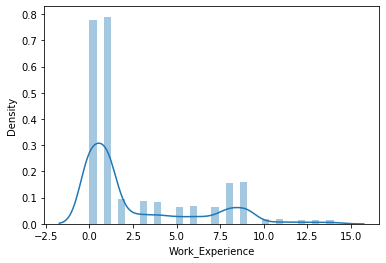

In [6]:
sns.distplot(train_data['Work_Experience'],kde=True)
plt.show()

##### Since we notice that distribution has length tails so, we need to find the values beyond +3 and -3 normal distribution.

In [7]:
print("Highest allowed",train_data['Work_Experience'].mean() + 3*train_data['Work_Experience'].std())
print("Lowest allowed",train_data['Work_Experience'].mean() - 3*train_data['Work_Experience'].std())

Highest allowed 12.861952169524843
Lowest allowed -7.578625743222867


In [8]:
outliers = train_data[(train_data['Work_Experience'] > 12) | (train_data['Work_Experience'] < 0)]

In [9]:
print(outliers)

          ID  Gender Ever_Married  Age Graduated     Profession  \
22    465602    Male          Yes   33       Yes         Artist   
42    464590  Female           No   27       Yes         Artist   
55    462110    Male          Yes   32       Yes         Artist   
321   467714    Male          Yes   89       Yes         Lawyer   
338   460255  Female           No   38       Yes         Doctor   
...      ...     ...          ...  ...       ...            ...   
7798  461215  Female           No   36       Yes         Artist   
7835  463655    Male          Yes   39       Yes         Artist   
7990  465597  Female           No   43       Yes  Entertainment   
8028  465501    Male          Yes   40       Yes         Artist   
8043  462049    Male          Yes   39       Yes         Artist   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
22               13.0            Low          2.0  Cat_3            A  
42               14.0            Low          3.0  

In [10]:
train_data['Work_Experience'].median()

1.0

In [11]:
outliers = outliers['Work_Experience']

In [12]:
train_data[(train_data['Work_Experience'] < 0)]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [13]:
test_data.shape

(2627, 10)

In [14]:
upper_limit = train_data['Work_Experience'].mean() + 3*train_data['Work_Experience'].std()
lower_limit = train_data['Work_Experience'].mean() + 3*train_data['Work_Experience'].std()

In [15]:
upper_limit

12.861952169524843

In [16]:
train_data['Work_Experience'] 

0       1.0
1       NaN
2       1.0
3       0.0
4       NaN
       ... 
8063    0.0
8064    3.0
8065    1.0
8066    1.0
8067    0.0
Name: Work_Experience, Length: 8068, dtype: float64

In [17]:
train_data['Work_Experience'] = train_data['Work_Experience'].apply(lambda x: 12.0 if x > 12 else x)

##### Now work_experience dataframe has been set to 12 max.

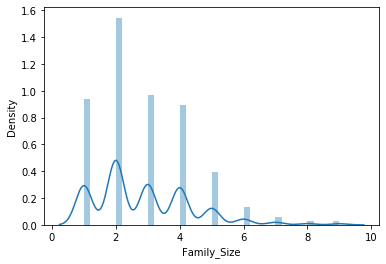

In [18]:
sns.distplot(train_data['Family_Size'],kde=True)
plt.show()

In [19]:
train_data['Family_Size'].describe()

count    7733.000000
mean        2.850123
std         1.531413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64

In [20]:
upper_limit_family = train_data['Family_Size'].mean() + 3*train_data['Family_Size'].std()
lower_limit_family = train_data['Family_Size'].mean() + 3*train_data['Family_Size'].std()

In [21]:
upper_limit_family

7.4443626961989855

In [22]:
train_data[(train_data['Family_Size'] > 7)] 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
26,467604,Male,No,31,No,Healthcare,9.0,Low,8.0,Cat_4,A
150,464972,Male,Yes,67,No,Lawyer,0.0,High,9.0,Cat_4,A
202,464863,Female,Yes,25,No,Engineer,6.0,Average,8.0,Cat_4,D
292,459471,Female,No,32,No,Artist,NaN,Low,8.0,Cat_6,C
344,462391,Female,No,26,No,Healthcare,1.0,Low,8.0,Cat_7,C
...,...,...,...,...,...,...,...,...,...,...,...
7799,460608,Male,No,19,No,Healthcare,6.0,Low,8.0,Cat_7,D
7897,464675,Female,Yes,41,No,Doctor,0.0,Average,9.0,Cat_4,D
7900,462751,Male,No,31,No,Healthcare,3.0,Low,9.0,Cat_6,D
7993,463940,Female,No,26,No,Healthcare,1.0,Low,8.0,Cat_4,C


In [23]:
train_data['Family_Size'] = train_data['Family_Size'].apply(lambda x: 7.0 if x > 7.0 else x)

In [24]:
train_data['Family_Size'] = train_data['Family_Size'].apply(lambda x: 4.0 if x=='NaN' else x)

In [25]:
missed_family_values = np.where(train_data['Family_Size'].isna())

In [26]:
train_data['Family_Size'].head(20)

0     4.0
1     3.0
2     1.0
3     2.0
4     6.0
5     2.0
6     3.0
7     3.0
8     3.0
9     4.0
10    3.0
11    4.0
12    NaN
13    1.0
14    1.0
15    2.0
16    5.0
17    6.0
18    4.0
19    1.0
Name: Family_Size, dtype: float64

In [27]:
train_data['Family_Size'].fillna(3.0, inplace = True)

In [28]:
train_data['Family_Size'].median()

3.0

In [29]:
train_data['Work_Experience'].fillna(1.0, inplace = True)

In [30]:
train_data['Work_Experience'].isna().sum()

0

In [31]:
train_data_updated = train_data.dropna(axis=0)
test_data_updated = test_data.dropna()

In [32]:
print(train_data_updated.shape)
print(test_data_updated.shape)

(7669, 11)
(2154, 10)


In [33]:
from lightgbm  import LGBMClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#!pip install xgboost
#!pip install lightgbm
from xgboost import XGBClassifier

C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Gobinath\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Ever_Married'] = le.fit_transform(X['Ever_Married'])
X['Graduated'] = le.fit_transform(X['Graduated'])
X['Profession'] = le.fit_transform(X['Profession'])
X['Spending_Score'] = le.fit_transform(X['Spending_Score'])
X['Var_1'] = le.fit_transform(X['Var_1'])

In [52]:
rf_model   = RandomForestClassifier()
adb_model  = AdaBoostClassifier()
gb_model   = GradientBoostingClassifier()
xgb_model  = XGBClassifier()
lgbm_model = LGBMClassifier()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = train_data_updated.drop(['ID','Segmentation'],axis=1)
y = train_data_updated[['Segmentation']]

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [56]:
x_train.shape,y_train.shape

((6135, 9), (6135, 1))

In [57]:
x_test.shape,y_test.shape

((1534, 9), (1534, 1))

In [58]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Ever_Married'] = le.fit_transform(X['Ever_Married'])
X['Graduated'] = le.fit_transform(X['Graduated'])
X['Profession'] = le.fit_transform(X['Profession'])
X['Spending_Score'] = le.fit_transform(X['Spending_Score'])
X['Var_1'] = le.fit_transform(X['Var_1'])

In [60]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


### Model training 

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
%%time
rf_model.fit(x_train,y_train)

Wall time: 282 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
%%time
adb_model.fit(x_train,y_train)

Wall time: 651 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
%%time
gb_model.fit(x_train,y_train)

Wall time: 1.83 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
%%time
lgbm_model.fit(x_train,y_train)

Wall time: 894 ms


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Model testing

In [71]:
y_pred_rf   = rf_model.predict(x_test)
y_pred_adb  = adb_model.predict(x_test)
y_pred_gb   = gb_model.predict(x_test)
y_pred_lgbm = lgbm_model.predict(x_test)

### Model Evaluation

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,fbeta_score

##### Random forest classifier

In [73]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_rf),4))
print('Precision score : ',round(precision_score(y_test,y_pred_rf,average = 'weighted'),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_rf,average = 'weighted'),4))
print('f1 score        : ',round(f1_score(y_test,y_pred_rf,average = 'weighted'),4))
print('fbeta score        :',round(fbeta_score(y_test,y_pred_rf,average = 'weighted',beta=0.2),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))


Accuracy score  :  0.4759
Precision score :  0.4817
Recall score    :  0.4759
f1 score        :  0.4781
fbeta score        : 0.4814
Confusion Matrix:
 [[165  87  50  71]
 [ 92 130  93  41]
 [ 72  98 177  32]
 [ 94  41  33 258]]


##### Adaboost classifier

In [74]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_adb),4))
print('Precision score : ',round(precision_score(y_test,y_pred_adb,average = 'weighted'),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_adb,average = 'weighted'),4))
print('f1 score        : ',round(f1_score(y_test,y_pred_adb,average = 'weighted'),4))
print('fbeta score        :',round(fbeta_score(y_test,y_pred_adb,average = 'weighted',beta=0.2),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_adb))

Accuracy score  :  0.5143
Precision score :  0.4994
Recall score    :  0.5143
f1 score        :  0.5023
fbeta score        : 0.4992
Confusion Matrix:
 [[167  54  65  87]
 [118  84 111  43]
 [ 50  61 233  35]
 [ 68  29  24 305]]


##### gradient boosting

In [75]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_gb),4))
print('Precision score : ',round(precision_score(y_test,y_pred_gb,average = 'weighted'),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_gb,average = 'weighted'),4))
print('f1 score        : ',round(f1_score(y_test,y_pred_gb,average = 'weighted'),4))
print('fbeta score        :',round(fbeta_score(y_test,y_pred_gb,average = 'weighted',beta=0.2),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_gb))

Accuracy score  :  0.5515
Precision score :  0.5425
Recall score    :  0.5515
f1 score        :  0.5456
fbeta score        : 0.5427
Confusion Matrix:
 [[182  74  40  77]
 [ 88 119 103  46]
 [ 43  66 233  37]
 [ 71  33  10 312]]


##### light gradient boosting

In [76]:
print('Accuracy score  : ',round(accuracy_score(y_test,y_pred_lgbm),4))
print('Precision score : ',round(precision_score(y_test,y_pred_lgbm,average = 'weighted'),4))
print('Recall score    : ',round(recall_score(y_test,y_pred_lgbm,average = 'weighted'),4))
print('f1 score        : ',round(f1_score(y_test,y_pred_lgbm,average = 'weighted'),4))
print('fbeta score        :',round(fbeta_score(y_test,y_pred_lgbm,average = 'weighted',beta=0.2),4))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lgbm))

Accuracy score  :  0.543
Precision score :  0.5368
Recall score    :  0.543
f1 score        :  0.5383
fbeta score        : 0.5368
Confusion Matrix:
 [[188  70  40  75]
 [ 84 121 103  48]
 [ 50  68 225  36]
 [ 84  25  18 299]]


In [127]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
1693,Female,No,28,No,Engineer,3.0,Low,7.0,Cat_4
6588,Female,No,27,No,Marketing,0.0,Low,3.0,Cat_2
2575,Male,Yes,37,Yes,Entertainment,0.0,Average,3.0,Cat_6
3317,Male,Yes,37,Yes,Artist,6.0,Low,2.0,Cat_6
4138,Male,No,26,No,Doctor,1.0,Low,1.0,Cat_6
...,...,...,...,...,...,...,...,...,...
7648,Female,Yes,30,Yes,Healthcare,0.0,Average,4.0,Cat_6
7212,Male,Yes,55,Yes,Artist,9.0,Average,2.0,Cat_1
2317,Male,Yes,79,No,Lawyer,0.0,Low,1.0,Cat_6
2353,Female,Yes,86,No,Lawyer,1.0,Low,1.0,Cat_6


In [79]:
from sklearn.model_selection import RepeatedKFold

X_sample = train_data_updated.drop(['ID','Segmentation'],axis=1)
y_sample = train_data_updated[['Segmentation']]

rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=42)

for train_index, test_index in rkf.split(X_sample):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_sample[train_index], X_sample[test_index]
    y_train, y_test = y_sample[train_index], y_sample[test_index]

TRAIN: [   1    2    3 ... 7665 7667 7668] TEST: [   0    8   12 ... 7662 7664 7666]


KeyError: "None of [Int64Index([   1,    2,    3,    4,    5,    6,    7,    9,   10,   11,\n            ...\n            7651, 7652, 7653, 7654, 7655, 7657, 7663, 7665, 7667, 7668],\n           dtype='int64', length=3834)] are in the [columns]"

In [141]:
X_sample_1 = pd.read_csv(r'C:\Users\Gobinath\Desktop\tasks\customer segementation unsupervised learning\Train1.csv')

In [142]:
#X_sample = X_sample.iloc[:,0].drop()
X_sample_1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [91]:
X_sample['Work_Experience'] = X_sample['Work_Experience'].apply(lambda x: 12.0 if x > 12 else x)
X_sample['Family_Size'] = X_sample['Family_Size'].apply(lambda x: 7.0 if x > 7.0 else x)

In [93]:
X_sample['Work_Experience']=X_sample['Family_Size'].fillna(3.0, inplace = True)
X_sample['Family_Size']=X_sample['Work_Experience'].fillna(1.0, inplace = True)

In [95]:
X_sample.shape

(8068, 10)

In [98]:
X_sample = X_sample.isna().sum()

In [100]:
X_sample['Family_Size']

8068

In [109]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,,,,,,,,,
Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...
Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
